**Екатерина Апраксина**



Kaggle Score: 0.85107

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [4]:
from sklearn.metrics import roc_auc_score, mean_squared_error

y_true = [
  10,
  2,
  -1,
  3,
  7
]

y_predictions = [
  8, 
  1, 
  3, 
  -1, 
  6
]

mean_squared_error(y_true, y_predictions)

7.6

# Первая часть. Исследование.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# Просмотр случайных строк

data.sample()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1395,21,43.55,1011.5,Male,0,No,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
for col in cat_cols:
  data[col] = data[col].replace(' ', np.nan)

for col in num_cols:
  data[col] = data[col].replace(' ', np.nan)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
# вычисление медианы

max, min = float(data['TotalSpent'][0]), float(data['TotalSpent'][0])

for col in data['TotalSpent']:
  if col != np.nan:
    if float(col) < min:
      min = float(col)
    if float(col) > max:
      max = float(col)

mediane = (max + min) / 2
mediane

4351.799999999999

Замена пустых ячеек в 'TotalSpent' на найденное значение медианы

In [ ]:
data['TotalSpent'] = data['TotalSpent'].replace(np.nan, mediane)
data['TotalSpent'] = data['TotalSpent'].astype('float')

In [ ]:
data.describe(include=['object', 'bool'])

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(array([1205.,  565.,  425.,  423.,  388.,  362.,  340.,  364.,  377.,
         833.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

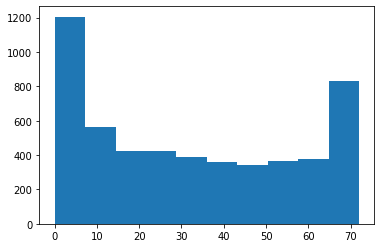

In [ ]:
plt.hist(data['ClientPeriod'])


(array([1207.,  142.,  267.,  479.,  350.,  663.,  713.,  659.,  573.,
         229.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

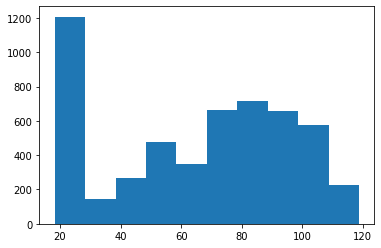

In [ ]:
plt.hist(data['MonthlySpending'])

(array([2037.,  901.,  501.,  392.,  352.,  308.,  305.,  222.,  172.,
          92.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

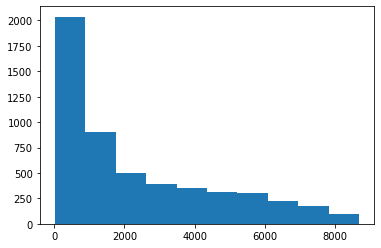

In [ ]:
plt.hist(data['TotalSpent'])

([<matplotlib.patches.Wedge at 0x7ff1f7e489b0>,
 [Text(-0.009159362348197024, 1.0999618657396149, 'Male'),
  Text(0.009159362348196646, -1.0999618657396149, 'Female')])

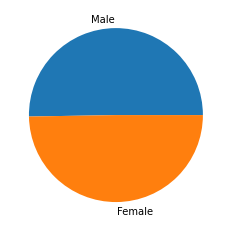

In [ ]:
plt.pie(data['Sex'].value_counts(), labels=['Male', 'Female'])

([<matplotlib.patches.Wedge at 0x7ff1f8425cf8>,
 [Text(-0.964919024239505, 0.5281394481201738, '0'),
  Text(0.964918974791517, -0.5281395384624107, '1')])

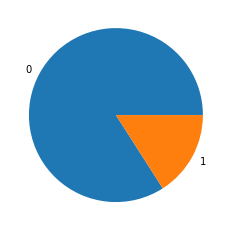

In [ ]:
plt.pie(data['IsSeniorCitizen'].value_counts(), labels=[0, 1])

([<matplotlib.patches.Wedge at 0x7ff1f83d7fd0>,
 [Text(-0.041861890518861924, 1.0992031578021357, 'No'),
  Text(0.0418618905188613, -1.0992031578021357, 'Yes')])

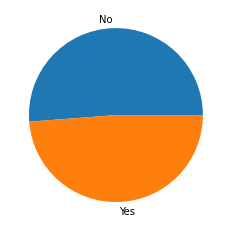

In [ ]:
plt.pie(data['HasPartner'].value_counts(), labels=['No', 'Yes'])

([<matplotlib.patches.Wedge at 0x7ff1f7d8f390>,
 [Text(-0.6351846285271064, 0.8980759921537164, 'No'),
  Text(0.6351845444431607, -0.8980760516239894, 'Yes')])

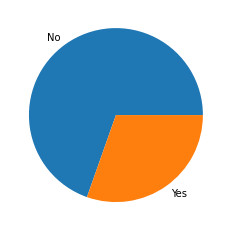

In [ ]:
plt.pie(data['HasChild'].value_counts(), labels=['No', 'Yes'])

([<matplotlib.patches.Wedge at 0x7ff1f7d4fd30>,
 [Text(-1.0476082428963913, 0.3354354921822308, 'No'),
  Text(1.047608258599259, -0.3354354431401494, 'Yes')])

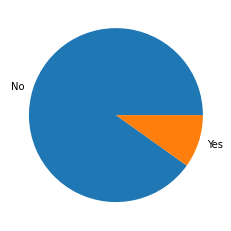

In [ ]:
plt.pie(data['HasPhoneService'].value_counts(), labels=['No', 'Yes'])

([<matplotlib.patches.Wedge at 0x7ff1f7d176d8>,
 [Text(0.08496786519929957, 1.0967134821289806, 'No'),
  Text(-0.4153543341151464, -1.0185680031945652, 'Yes'),
  Text(1.047608195787775, -0.33543563930847126, 'No phone service')])

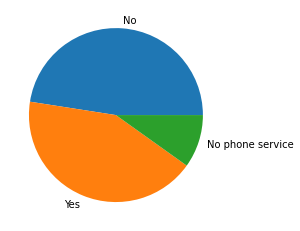

In [ ]:
plt.pie(data['HasMultiplePhoneNumbers'].value_counts(), labels=['No', 'Yes', 'No phone service'])

([<matplotlib.patches.Wedge at 0x7ff1f7cde6d8>,
 [Text(0.19523535695609204, 1.082535521539237, 'Fiber optic'),
  Text(-0.831519229870568, -0.7201220524018533, 'DSL'),
  Text(0.8562724461688671, -0.6905052483015497, 'No')])

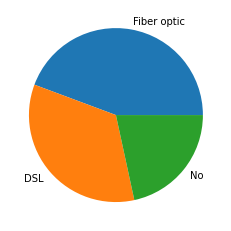

In [ ]:
plt.pie(data['HasInternetService'].value_counts(), labels=['Fiber optic', 'DSL', 'No'])

([<matplotlib.patches.Wedge at 0x7ff1f7ca5710>,
 [Text(0.018972287490136876, 1.0998363752428775, 'No'),
  Text(-0.7051711635185708, -0.8442355300162777, 'Yes'),
  Text(0.8562724461688671, -0.6905052483015497, 'No internet service')])

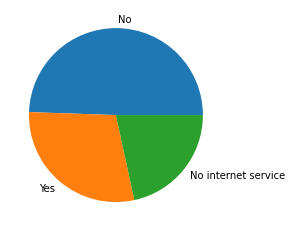

In [ ]:
plt.pie(data['HasOnlineSecurityService'].value_counts(), labels=['No', 'Yes', 'No internet service'])

([<matplotlib.patches.Wedge at 0x7ff1f7c6c710>,
 [Text(0.20102726101304613, 1.0814749374486645, 'No'),
  Text(-0.8353620560017335, -0.7156606985105141, 'Yes'),
  Text(0.8562724461688671, -0.6905052483015497, 'No internet service')])

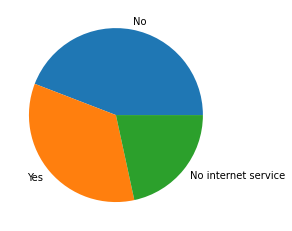

In [ ]:
plt.pie(data['HasOnlineBackup'].value_counts(), labels=['No', 'Yes', 'No internet service'])

([<matplotlib.patches.Wedge at 0x7ff1f7c37710>,
 [Text(0.21066761955548036, 1.0796384367327923, 'No'),
  Text(-0.8417135647499299, -0.7081795499136966, 'Yes'),
  Text(0.8562724461688671, -0.6905052483015497, 'No internet service')])

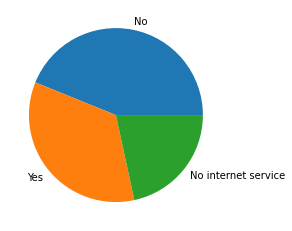

In [ ]:
plt.pie(data['HasDeviceProtection'].value_counts(), labels=['No', 'Yes', 'No internet service'])

([<matplotlib.patches.Wedge at 0x7ff1f7bfe710>,
 [Text(0.02420530037523562, 1.099733651132739, 'No'),
  Text(-0.7091802117308473, -0.8408706364770925, 'Yes'),
  Text(0.8562724461688671, -0.6905052483015497, 'No internet service')])

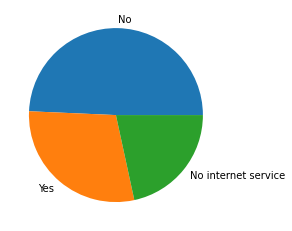

In [ ]:
plt.pie(data['HasTechSupportAccess'].value_counts(), labels=['No', 'Yes', 'No internet service'])

([<matplotlib.patches.Wedge at 0x7ff1f7b49710>,
 [Text(0.34849390484764886, 1.0433369533779766, 'No'),
  Text(-0.9262140009003823, -0.593403424776186, 'Yes'),
  Text(0.8562724461688671, -0.6905052483015497, 'No internet service')])

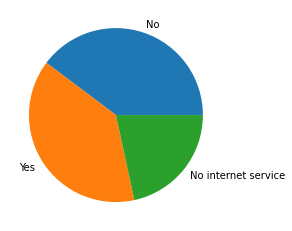

In [ ]:
plt.pie(data['HasOnlineTV'].value_counts(), labels=['No', 'Yes', 'No internet service'])

([<matplotlib.patches.Wedge at 0x7ff1f7b13710>,
 [Text(0.3596436215391238, 1.0395462786649874, 'No'),
  Text(-0.9325137407996674, -0.5834536170252188, 'Yes'),
  Text(0.8562724461688671, -0.6905052483015497, 'No internet service')])

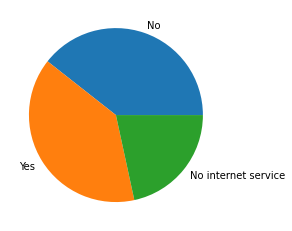

In [ ]:
plt.pie(data['HasMovieSubscription'].value_counts(), labels=['No', 'Yes', 'No internet service'])

([<matplotlib.patches.Wedge at 0x7ff1f7ada6a0>,
 [Text(-0.18169941215068605, 1.084889544434868, 'Mouth-to-mouth'),
  Text(-0.5056167674945121, -0.9769092508664254, 'Two year'),
  Text(0.879971269716261, -0.6600383053080718, 'One year')])

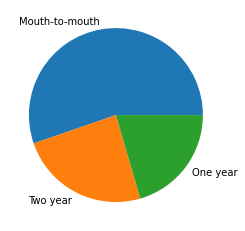

In [ ]:
plt.pie(data['HasContractPhone'].value_counts(), labels=['Mouth-to-mouth', 'Two year', 'One year'])

([<matplotlib.patches.Wedge at 0x7ff1f7aa5710>,
 [Text(-0.32670075120036934, 1.050364993307143, 'No'),
  Text(0.326700751200369, -1.050364993307143, 'Yes')])

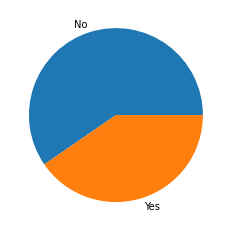

In [ ]:
plt.pie(data['IsBillingPaperless'].value_counts(), labels=['No', 'Yes'])

([<matplotlib.patches.Wedge at 0x7ff1f7a6f0b8>,
 [Text(0.5355843199806599, 0.9608066591103822, 'Electronic check'),
  Text(-1.0486011182882786, 0.33231866442403074, 'Mailed check'),
  Text(-0.5061978913326836, -0.9766082606707487, 'Bank transfer (automatic)'),
  Text(0.8554503357781398, -0.6915234797294074, 'Credit card (automatic)')])

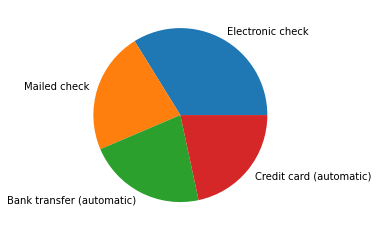

In [ ]:
plt.pie(data['PaymentMethod'].value_counts(), labels=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

На одном графике:

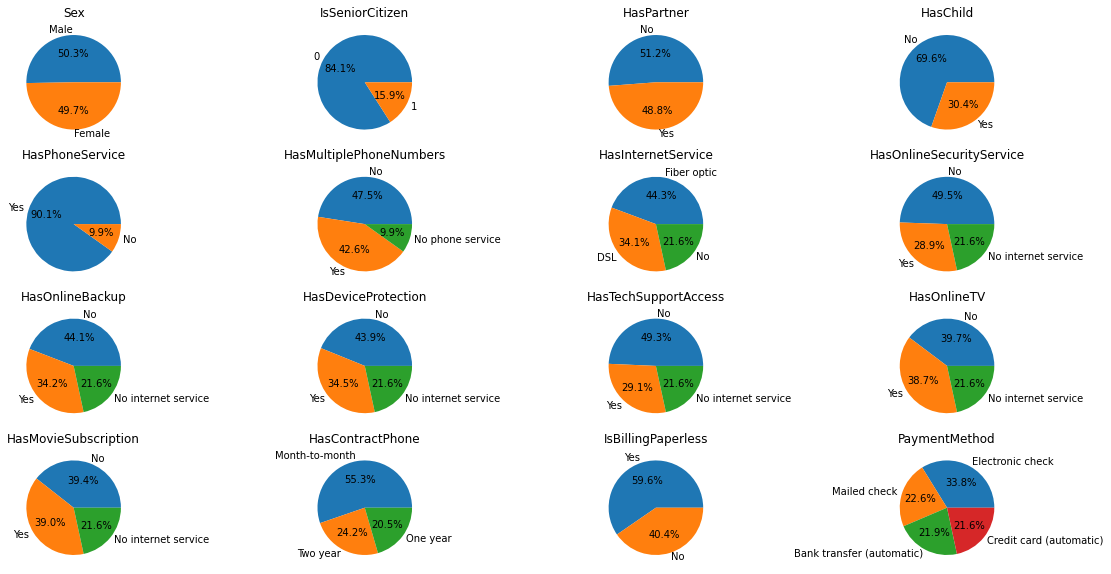

In [ ]:
fig,axes = plt.subplots(4, 4, figsize = (20,10))
axes = axes.flatten()
for index, cat in enumerate(cat_cols):
    tmp_pandas_list_values_counts = data[cat].value_counts()
    axes[index].pie(x = tmp_pandas_list_values_counts.values, labels = tmp_pandas_list_values_counts.index,
                   autopct = '%1.1f%%')
    axes[index].title.set_text(cat)

In [ ]:
data['Churn'].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Значит, классы не сбалансированы, но в данном случае это не критично (различие примерно в 3 раза)

Далее будут небольшие эксперименты с методами и т.п., в задании этого не было

In [ ]:
data['Churn'].mean()

0.26202196137826583

 *Каковы средние значения числовых признаков среди нелояльных пользователей?*

In [ ]:
data[data['Churn'] == 1].mean()

ClientPeriod         17.951590
MonthlySpending      74.281178
TotalSpent         1525.831864
IsSeniorCitizen       0.255780
Churn                 1.000000
dtype: float64

*Какой максимальный период использования услуг среди нелояльных клиентов?*

In [ ]:
data[data['Churn'] == 1]['ClientPeriod'].max()

72

*Группировка данных по лояльным/нелояльным клиентам*

In [ ]:
columns_to_show = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']

data.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

ClientPeriod                        ... TotalSpent                   
             count       mean        std  ...        min       50%      max
Churn                                     ...                              
0           3898.0  37.525911  24.123750  ...       18.8  1716.675  8672.45
1           1384.0  17.951590  19.460135  ...       19.1   706.725  8684.80

[2 rows x 18 columns]

*Таблица сопряжённости*

In [ ]:
pd.crosstab(data['Churn'], data['HasPhoneService'])

HasPhoneService,No,Yes
Churn,,
0,392,3506
1,129,1255


In [ ]:
pd.crosstab(data['Churn'], data['HasInternetService'], normalize=True)

HasInternetService,DSL,Fiber optic,No
Churn,,,
0,0.276032,0.261454,0.200492
1,0.064748,0.181749,0.015524


In [ ]:
data.pivot_table(['ClientPeriod', 'MonthlySpending'], 
['Churn'], aggfunc='mean').head(10)

,ClientPeriod,MonthlySpending
Churn,,
0,37.525911,61.602719
1,17.951590,74.281178


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

parameters = {'classifier__C':[100, 10, 1, 0.1, 0.01, 0.001]}

clf = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('classifier', LogisticRegression(max_iter=1000))])

features = ['']

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols] , data[target_col], random_state=0)

model = GridSearchCV(clf, parameters, scoring='roc_auc')

model.fit(X_train, y_train)
model.score(X_test, y_test)



0.8289712696941614

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
model.best_params_

{'classifier__C': 10}

Лучшее качество: 

> 0.8289712696941614

 при C = 10



## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier, Pool

     |████████████████████████████████| 66.2MB 58kB/s 


Со стандартными параметрами:

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(data[feature_cols] , data[target_col], random_state=0)
c0_model = CatBoostClassifier()

c0_model.fit(X_train0, y_train0, cat_features=cat_cols)

c0_model.best_score_

Learning rate set to 0.018544
0:	learn: 0.6800009	total: 72.9ms	remaining: 1m 12s
1:	learn: 0.6678599	total: 87.3ms	remaining: 43.6s
2:	learn: 0.6564931	total: 101ms	remaining: 33.7s
3:	learn: 0.6465776	total: 109ms	remaining: 27.1s
4:	learn: 0.6384277	total: 117ms	remaining: 23.3s
5:	learn: 0.6289172	total: 131ms	remaining: 21.8s
6:	learn: 0.6200241	total: 140ms	remaining: 19.8s
7:	learn: 0.6115404	total: 153ms	remaining: 19s
8:	learn: 0.6029001	total: 167ms	remaining: 18.4s
9:	learn: 0.5969742	total: 171ms	remaining: 16.9s
10:	learn: 0.5888207	total: 185ms	remaining: 16.6s
11:	learn: 0.5826781	total: 190ms	remaining: 15.6s
12:	learn: 0.5762277	total: 201ms	remaining: 15.3s
13:	learn: 0.5704019	total: 218ms	remaining: 15.3s
14:	learn: 0.5641978	total: 232ms	remaining: 15.2s
15:	learn: 0.5576004	total: 256ms	remaining: 15.7s
16:	learn: 0.5523866	total: 269ms	remaining: 15.5s
17:	learn: 0.5472148	total: 279ms	remaining: 15.2s
18:	learn: 0.5435772	total: 285ms	remaining: 14.7s
19:	learn:

{'learn': {'Logloss': 0.3075788337474973}}

Теперь с подборкой параметров:

In [ ]:
 X_train1, X_test1, y_train1, y_test1 = train_test_split(data[feature_cols] , data[target_col])

params = {'num_trees': np.array([100, 200, 300, 400, 500, 600, 700]),
          'learning_rate': np.array([0.01, 0.03, 0.1, 0.2, 0.5]),
         }

c_model = CatBoostClassifier()

gs = GridSearchCV(c_model, params, scoring='roc_auc')

gs.fit(X_train, y_train, cat_features=cat_cols)



Выходные данные были обрезаны до нескольких последних строк (5000).
401:	learn: 0.0365245	total: 5.89s	remaining: 2.9s
402:	learn: 0.0362757	total: 5.91s	remaining: 2.89s
403:	learn: 0.0361352	total: 5.92s	remaining: 2.87s
404:	learn: 0.0360814	total: 5.94s	remaining: 2.86s
405:	learn: 0.0360317	total: 5.96s	remaining: 2.85s
406:	learn: 0.0359572	total: 5.98s	remaining: 2.84s
407:	learn: 0.0357994	total: 6s	remaining: 2.82s
408:	learn: 0.0357503	total: 6.01s	remaining: 2.81s
409:	learn: 0.0356608	total: 6.02s	remaining: 2.79s
410:	learn: 0.0355793	total: 6.04s	remaining: 2.77s
411:	learn: 0.0354595	total: 6.05s	remaining: 2.76s
412:	learn: 0.0353782	total: 6.06s	remaining: 2.75s
413:	learn: 0.0351658	total: 6.08s	remaining: 2.73s
414:	learn: 0.0350778	total: 6.09s	remaining: 2.71s
415:	learn: 0.0350676	total: 6.11s	remaining: 2.7s
416:	learn: 0.0349725	total: 6.12s	remaining: 2.69s
417:	learn: 0.0344880	total: 6.13s	remaining: 2.67s
418:	learn: 0.0344008	total: 6.15s	remaining: 2.65s
4

GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f0b5267c7b8>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': array([0.01, 0.03, 0.1 , 0.2 , 0.5 ]),
                         'num_trees': array([100, 200, 300, 400, 500, 600, 700])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
gs.best_score_

0.8513480137684504

In [ ]:
gs.best_params_

{'learning_rate': 0.01, 'num_trees': 700}

Качество: 


> 0.8513480137684504


Параметры:

> learning_rate: 0.01



> num_trees: 700



In [ ]:
gs_test = CatBoostClassifier(learning_rate=0.01, num_trees=700)

gs_test.fit(X_train, y_train, cat_features=cat_cols)


0:	learn: 0.6860037	total: 15.7ms	remaining: 11s
1:	learn: 0.6792534	total: 30.6ms	remaining: 10.7s
2:	learn: 0.6727778	total: 44.6ms	remaining: 10.4s
3:	learn: 0.6669850	total: 52.5ms	remaining: 9.13s
4:	learn: 0.6606116	total: 65.9ms	remaining: 9.16s
5:	learn: 0.6551367	total: 73.3ms	remaining: 8.48s
6:	learn: 0.6497711	total: 81.9ms	remaining: 8.1s
7:	learn: 0.6439113	total: 94.8ms	remaining: 8.2s
8:	learn: 0.6380914	total: 108ms	remaining: 8.29s
9:	learn: 0.6324836	total: 121ms	remaining: 8.38s
10:	learn: 0.6269264	total: 135ms	remaining: 8.45s
11:	learn: 0.6221406	total: 149ms	remaining: 8.52s
12:	learn: 0.6170947	total: 161ms	remaining: 8.49s
13:	learn: 0.6121993	total: 172ms	remaining: 8.45s
14:	learn: 0.6078874	total: 185ms	remaining: 8.43s
15:	learn: 0.6031408	total: 199ms	remaining: 8.52s
16:	learn: 0.5991136	total: 207ms	remaining: 8.33s
17:	learn: 0.5948125	total: 226ms	remaining: 8.58s
18:	learn: 0.5908704	total: 235ms	remaining: 8.42s
19:	learn: 0.5863018	total: 250ms	rem

Ещё одна модель, меняется только количество итераций

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data[feature_cols] , data[target_col])

params = {'iterations': np.array([160])}

c_model1 = CatBoostClassifier()

gs1 = GridSearchCV(c_model, params, scoring='roc_auc')

gs1.fit(X_train, y_train, cat_features=cat_cols)

Learning rate set to 0.090488
0:	learn: 0.6636759	total: 5.3ms	remaining: 843ms
1:	learn: 0.6363030	total: 9.55ms	remaining: 754ms
2:	learn: 0.6139826	total: 13.8ms	remaining: 721ms
3:	learn: 0.5925426	total: 18.7ms	remaining: 731ms
4:	learn: 0.5748413	total: 22.8ms	remaining: 706ms
5:	learn: 0.5596465	total: 27.1ms	remaining: 696ms
6:	learn: 0.5462049	total: 31.6ms	remaining: 690ms
7:	learn: 0.5340416	total: 36.1ms	remaining: 685ms
8:	learn: 0.5216476	total: 40.5ms	remaining: 680ms
9:	learn: 0.5120214	total: 42.6ms	remaining: 640ms
10:	learn: 0.5020967	total: 47ms	remaining: 637ms
11:	learn: 0.4938017	total: 51.6ms	remaining: 636ms
12:	learn: 0.4870560	total: 53.8ms	remaining: 608ms
13:	learn: 0.4807546	total: 58.1ms	remaining: 606ms
14:	learn: 0.4746425	total: 62.5ms	remaining: 605ms
15:	learn: 0.4702427	total: 64.2ms	remaining: 577ms
16:	learn: 0.4664063	total: 65.9ms	remaining: 554ms
17:	learn: 0.4622244	total: 69.3ms	remaining: 547ms
18:	learn: 0.4583287	total: 72.7ms	remaining: 5

GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f0b5267c7b8>,
             iid='deprecated', n_jobs=None,
             param_grid={'iterations': array([160])}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='roc_auc',
             verbose=0)

In [ ]:
gs1.best_score_

0.8515663770427

Ещё одна модель

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data[feature_cols] , data[target_col], test_size = 0.2)

catboost_model = CatBoostClassifier(eval_metric='AUC:hints=skip_train~false',random_seed=42, verbose=200, cat_features=cat_cols)

param_grid = {'learning_rate':[0.1,0.05,0.03,0.15,0.2],
             'depth': [5,6,7,8,9,10],
             'iterations': [500,1000,1500]}

catboost_model.grid_search(param_grid, X_train, y_train, partition_random_seed=42)

catboost_model.get_all_params()


bestTest = 0.8477060286
bestIteration = 96

0:	loss: 0.8477060	best: 0.8477060 (0)	total: 5.21s	remaining: 7m 44s

bestTest = 0.849768459
bestIteration = 142

1:	loss: 0.8497685	best: 0.8497685 (1)	total: 10.3s	remaining: 7m 31s

bestTest = 0.8487865535
bestIteration = 236

2:	loss: 0.8487866	best: 0.8497685 (1)	total: 15.2s	remaining: 7m 19s

bestTest = 0.8481819741
bestIteration = 66

3:	loss: 0.8481820	best: 0.8497685 (1)	total: 20.4s	remaining: 7m 18s

bestTest = 0.8508189692
bestIteration = 22

4:	loss: 0.8508190	best: 0.8508190 (4)	total: 25.7s	remaining: 7m 16s

bestTest = 0.8477060286
bestIteration = 96

5:	loss: 0.8477060	best: 0.8508190 (4)	total: 36.2s	remaining: 8m 26s

bestTest = 0.849768459
bestIteration = 142

6:	loss: 0.8497685	best: 0.8508190 (4)	total: 46.7s	remaining: 9m 14s

bestTest = 0.8487865535
bestIteration = 236

7:	loss: 0.8487866	best: 0.8508190 (4)	total: 56.9s	remaining: 9m 43s

bestTest = 0.8481819741
bestIteration = 66

8:	loss: 0.8481820	best: 0.850819

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 5,
 'eval_metric': 'AUC:hints=skip_train~false',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 500,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.20000000298023224,
 'loss_function': 'Logloss',
 'm

In [ ]:
catboost_model_test = CatBoostClassifier(eval_metric='AUC:hints=skip_train~false',
                                        random_state=42, verbose=300, 
                                        cat_features=cat_cols, depth = 6,
                                        learning_rate = 0.0312, use_best_model=True,
                                        n_estimators=700, l2_leaf_reg = 15.07)

catboost_model_test.fit(X_train3, y_train3, eval_set=(X_test3, y_test3),cat_features=cat_cols,use_best_model=True)

0:	learn: 0.8295338	test: 0.8186688	best: 0.8186688 (0)	total: 17.2ms	remaining: 12s
300:	learn: 0.8775436	test: 0.8533438	best: 0.8533438 (300)	total: 4.26s	remaining: 5.65s
600:	learn: 0.8941752	test: 0.8508741	best: 0.8533702 (303)	total: 8.85s	remaining: 1.46s
699:	learn: 0.9005402	test: 0.8508433	best: 0.8533702 (303)	total: 10.5s	remaining: 0us

bestTest = 0.8533701594
bestIteration = 303

Shrink model to first 304 iterations.


# Предсказания

In [ ]:
best_model = gs1

In [ ]:
test = pd.read_csv('./test.csv')

max, min = float(test['TotalSpent'][0]), float(test['TotalSpent'][0])

for col in test['TotalSpent']:
  if col != '' and col !=' ':
    if float(col) < min:
      min = float(col)
    if float(col) > max:
      max = float(col)

mediane = (max + min) / 2

test['TotalSpent'] = test['TotalSpent'].replace(' ', mediane)
test['TotalSpent'] = test['TotalSpent'].astype('float')


submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(test)[:, 1]

submission.to_csv('./submission.csv', index=False)


# Kaggle (5 баллов)

Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. Получение вашего итогового Score должно быть воспроизводимо.

**Екатерина Апраксина**

Kaggle Score: 0.85107